# **Question 1 Part a)**
## **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To determine what could be going wrong with our calculation, I began by assert the dataset is within a 30-day range and investigating how the naive calculation was calculation. 
<br><br>
As it turns out the formula used for the naive calculation:
<br>*AOV = total revenue / number of orders*

In [2]:
data = pd.read_csv("datasetQ1.csv",header=0)
data = data.drop_duplicates()

aov = data['order_amount'].sum() / len(data)
print("Naive calculation of AOV = $" + str(round(aov,2))+"\n\n")

data = data.sort_values(by=['created_at'])
print(data['created_at'].head(1))
print(data['created_at'].tail(1))
print("\n The is within a 30-day range since it begans and ends in March 2017.")

Naive calculation of AOV = $3145.13


1862    2017-03-01 0:08:09
Name: created_at, dtype: object
145    2017-03-30 9:55:00
Name: created_at, dtype: object

 The is within a 30-day range since it begans and ends in March 2017.


Since AOV is calculated by taking the total revenue / number of orders, my first intutition was to check for outliers. There may be a single order or a group of orders that may skew up the average. <br><br>  I used a scatterplot to quick visualise any potential outliers. I chose the columns total_items and order_amount because they are relavent to the calculation of AOV.

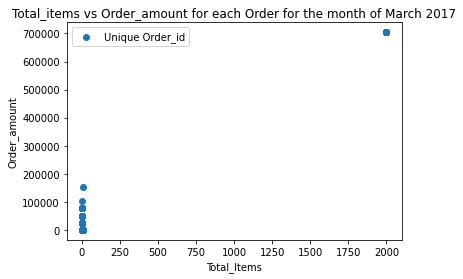

In [3]:
plt.scatter(data['total_items'], data['order_amount'],label='Unique Order_id')
plt.legend()
plt.xlabel('Total_Items')
plt.ylabel('Order_amount')
plt.title('Total_items vs Order_amount for each Order for the month of March 2017')
plt.show()


Showcased by the plot above, the majority of orders have a total_item count of less than 250. On the otherhand, there is one minority of order(s) of 2000 items which is signficiantly deviated from the rest of the data set.
<br><br>
To determine the cause of outliers, I sorted the dataset by order_amount and total_items respectively.
<br><br>
By observation, I notice that user 607 is repeated making large purchases of 2000 items. Although the action is suspicious, the reasoning is not relavent to our current context. Outside of the group of orders by User 607, there are also orders with a small amount of total_items resulting in a large order amount such as order 692, 2493, and 3725.
<br><br>
As such, we can not rule out the possiblities of having outliers on both ends of the dataset.

In [4]:
data.sort_values(by=['order_amount'],ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


In [5]:
data.sort_values(by=['total_items'],ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00


# **Question 1 Part a)**
## **Think about a better way to evaluate this data.**
3: methods
1. Remove the outliers
2. Alter the AOV formula:<br>
Naive:<br>
  *AOV = total revenue / number of orders*<br>
Altered:<br>
  *AOV = total revenue / number of items sold*

Just a quick plot to visualize the orders of user 607 compared to the other order.

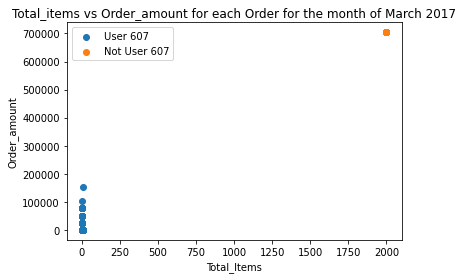

In [6]:
# The dataset containing user 607.
dataOutlier = data[data['user_id'] == 607]
# The dataset without user 607. 
dataNormal = data[data['user_id'] != 607]

plt.scatter(dataNormal['total_items'], dataNormal['order_amount'],label='User 607')
plt.scatter(dataOutlier['total_items'], dataOutlier['order_amount'],label='Not User 607')
plt.legend()
plt.xlabel('Total_Items')
plt.ylabel('Order_amount')
plt.title('Total_items vs Order_amount for each Order for the month of March 2017')
plt.show()

## **Question 1 Part b)**
What metric would you report for this dataset?
<br><br>

The metric I would report for this dataset is the **Mode**. The Mode, the most frequently occuring order value, is more robust to outliers resulting in less skewed values. In comparison, The Median which is the middle value of all orders maybe skewed towards one extreme if the extremely is significantly deviated from the norm. 
<br>  

## **Question 1 Part c)**
What is its value?




In [7]:
dataMode = data['order_amount'].mode()
dataMode[0]

153